## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## 1.Hierarchical Clustering

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing of csv file.
air_data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')


### Performing EDA on dataset
Now, I will explore the data to gain insights about the data. 

In [3]:
# Displaying first 5 rows

air_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Displaying last 5 rows

air_data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
# View dimensions of dataset 

air_data.shape   

(3999, 12)

<h4>Dataset has 3999 rows and 12 columns</h4>

In [6]:
# View summary of dataset

air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


<h4>The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.</h4>

### Missing Values in variable

In [7]:
air_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<h4>There is no any null value</h4>

In [8]:
# Check mathematical calculations 

air_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<h4>The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value etc.</h4>

In [9]:
air_data.value_counts()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?
1     28143    0           1          1          1          174          1            0                  0                7000               0         1
2691  11836    0           1          1          1          5075         14           350                1                2479               1         1
2678  27438    0           1          1          1          2528         6            2528               6                2490               0         1
2679  14748    0           1          1          1          2210         7            0                  0                2497               1         1
2680  49514    0           1          1          1          4500         22           0                  0                2569               0         1
                                                                                       

In [10]:
air_data=air_data.rename({'Award?':'Award'},axis=1) #renaming the Award columns.

In [11]:
# checking duplicates values 

air_data[air_data.duplicated()].shape         # so no record is duplicate.

(0, 12)

In [12]:
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
air_data1=air_data.drop(['ID#'],axis=1)

In [14]:
air_data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
# checking duplicates values 

air_data1[air_data1.duplicated()].shape       # so there is one record is duplicate.

(1, 11)

In [16]:
air_data1[air_data1.duplicated()]      #showing the duplicate row.

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [17]:
air_data1=air_data1.drop_duplicates()      #removing the duplicates 

In [18]:
air_data1[air_data1.duplicated()].shape

(0, 11)

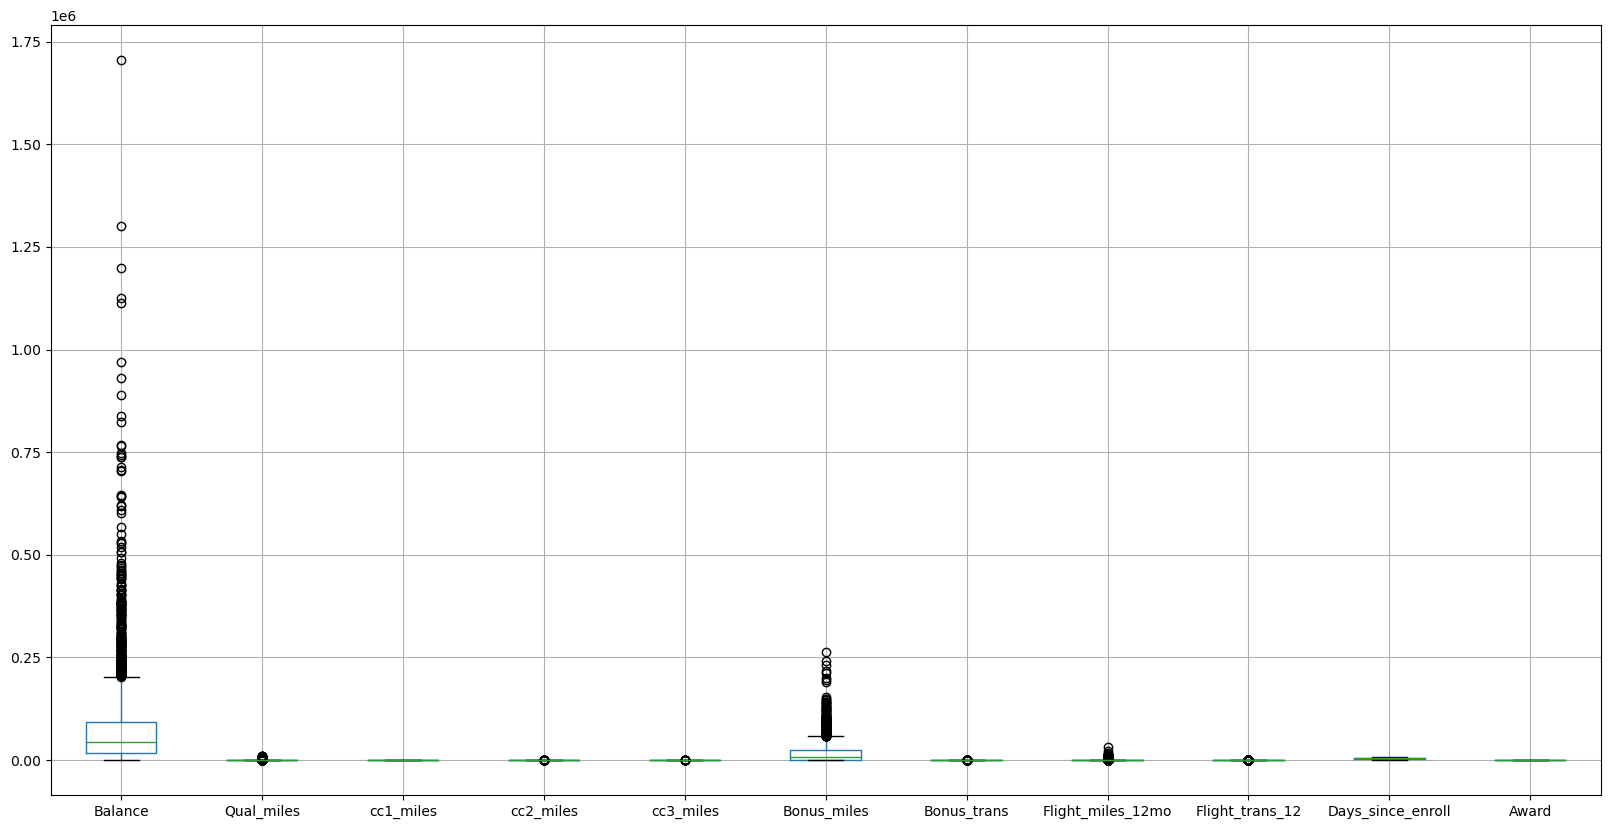

In [19]:
#checking outliers.
plt.figure(figsize=(20,10))
air_data1.boxplot()
plt.show()

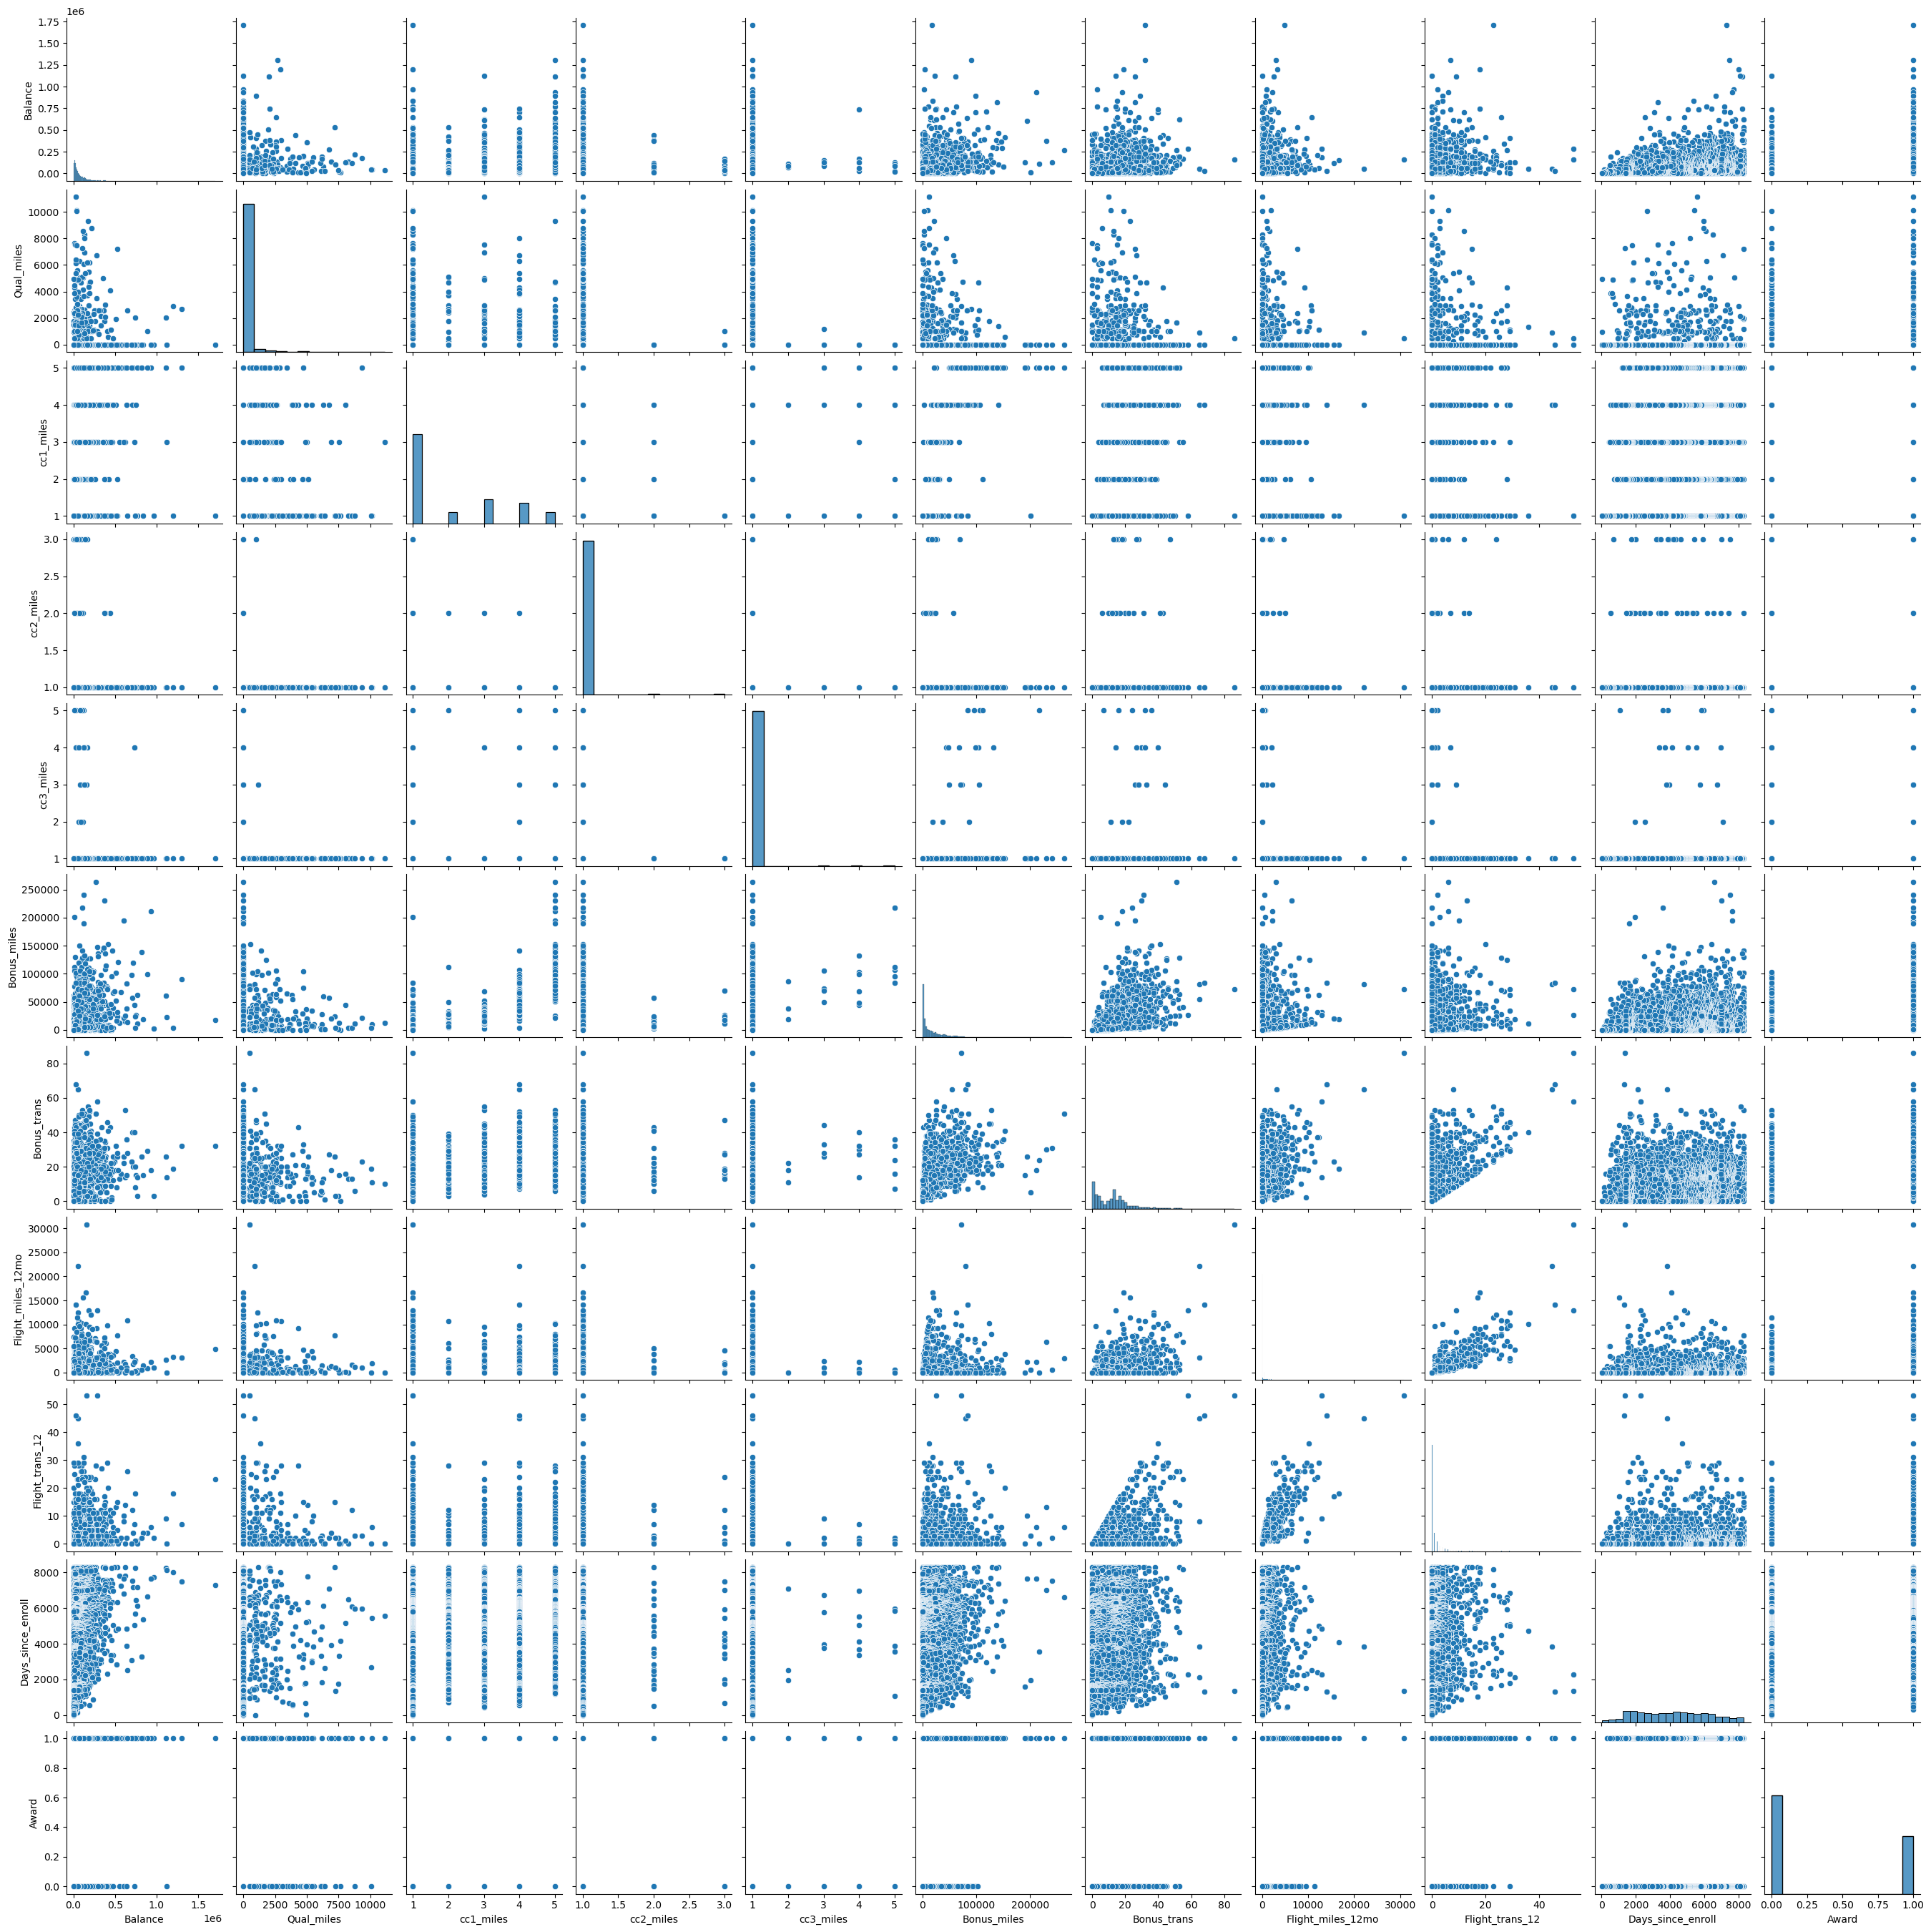

In [20]:
sns.pairplot(air_data1,kind='scatter')
plt.show()

<h4>As we can see above graphs are scatter.So, can not say any inference.</h4>

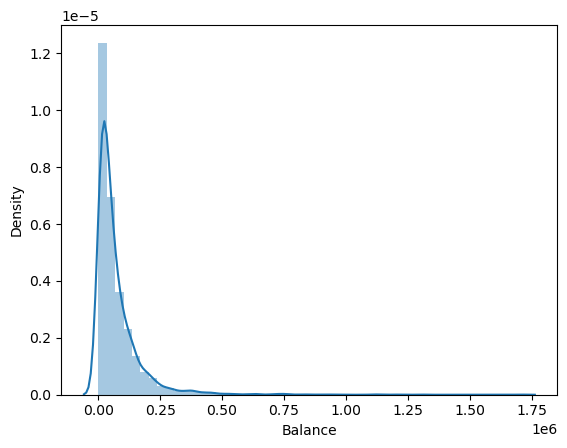

In [21]:
sns.distplot(air_data1['Balance'])
plt.show()

<h4>We can say that the Balance has right-skewed distribution.Means the mean is greter than the median.</h4>

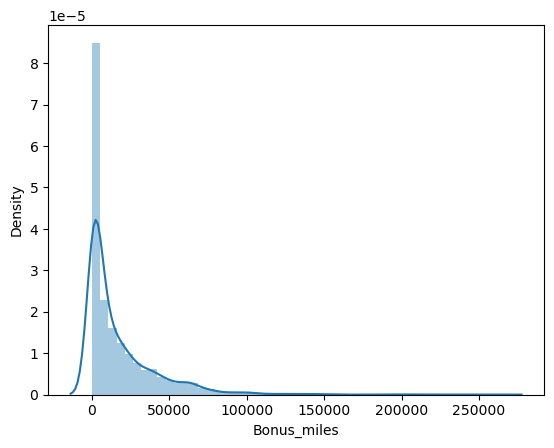

In [22]:
sns.distplot(air_data1['Bonus_miles'])
plt.show()

<h4>we can say that the Bonus_miles has right-skewed distribution.Means the mean is greter than the median.</h4>

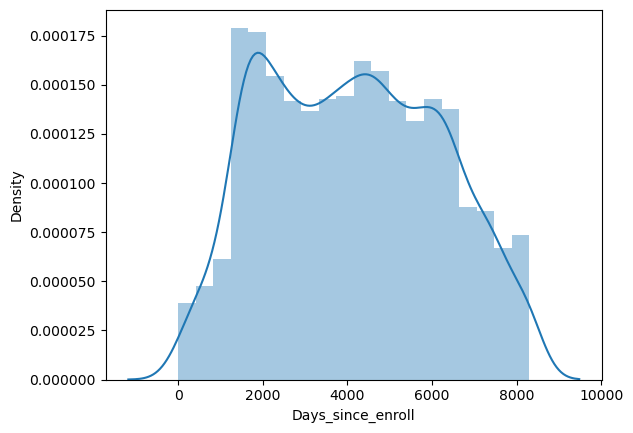

In [23]:
sns.distplot(air_data1['Days_since_enroll'])
plt.show()

<h4>From above graph we can not see any type of distuibuton.Because it may have extreme values, or may have a flatter or steeper “dome” than a typical bell.</h4>

In [24]:
air_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [25]:
air_data1['cc1_miles'].value_counts()

1    2288
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [26]:
air_data1['cc2_miles'].value_counts()

1    3955
2      28
3      15
Name: cc2_miles, dtype: int64

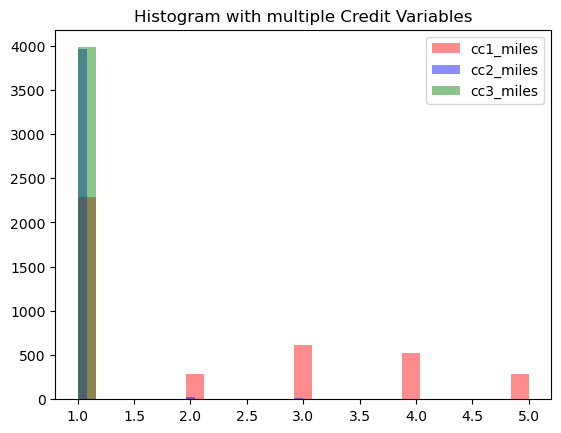

In [27]:
plt.hist(air_data1['cc1_miles'], bins=25, alpha=0.45, color='red')
plt.hist(air_data1['cc2_miles'], bins=25, alpha=0.45, color='blue')
plt.hist(air_data1['cc3_miles'], bins=25, alpha=0.45, color='green') 
plt.title("Histogram with multiple Credit Variables")
  
plt.legend(['cc1_miles', 'cc2_miles', 'cc3_miles'])
  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


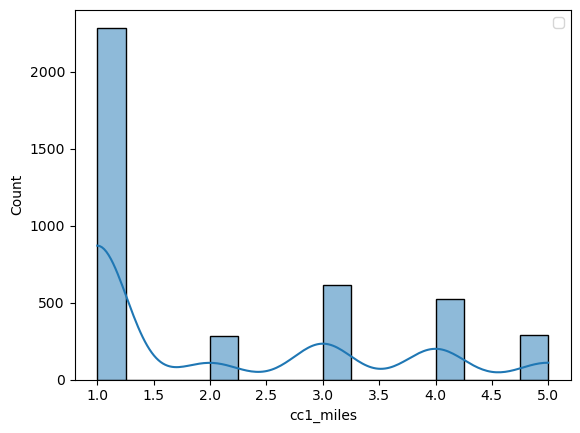

In [28]:
sns.histplot(data=air_data1, x="cc1_miles",kde=True)
plt.legend()

<AxesSubplot:xlabel='cc2_miles', ylabel='Count'>

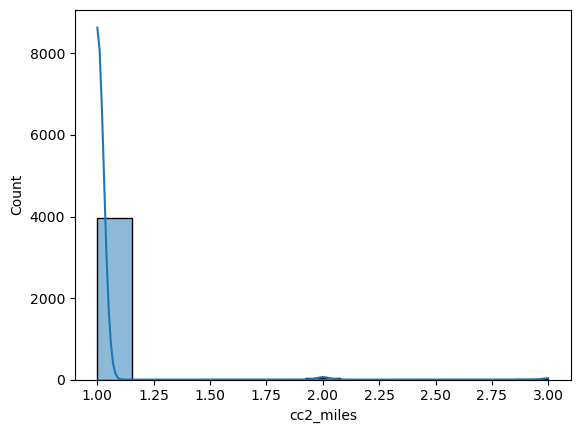

In [29]:
sns.histplot(data=air_data1, x="cc2_miles",kde=True)

<AxesSubplot:xlabel='cc3_miles', ylabel='Count'>

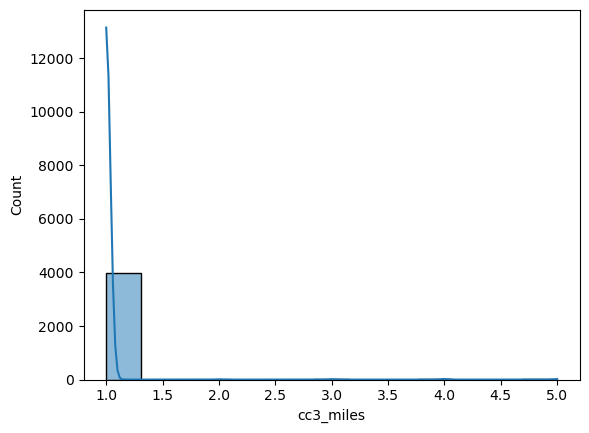

In [30]:
sns.histplot(data=air_data1, x="cc3_miles",kde=True)

### Correlation

In [31]:
cor=air_data1.corr() #Correlation between features.
cor

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


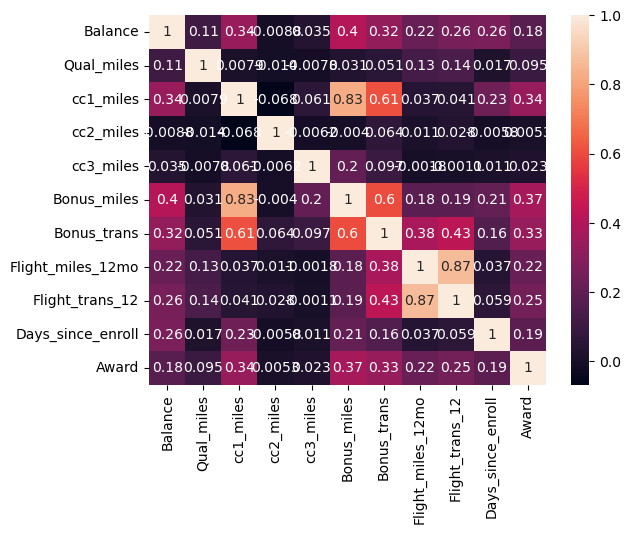

In [32]:
sns.heatmap(cor,annot=True)
plt.show()

<h4>we can say that the area having values more than 0.8 are highly correlated to each others.</h4>

<h4>to perform better or converge faster when the different features (variables) are on a smaller scale we use Normalization Method.</h4>

In [33]:
# Normalization function

def norm_fun(i):
    x= (i-i.min())/(i.max()-i.min())
    return x

In [34]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_fun(air_data1.iloc[:,0:])

In [35]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


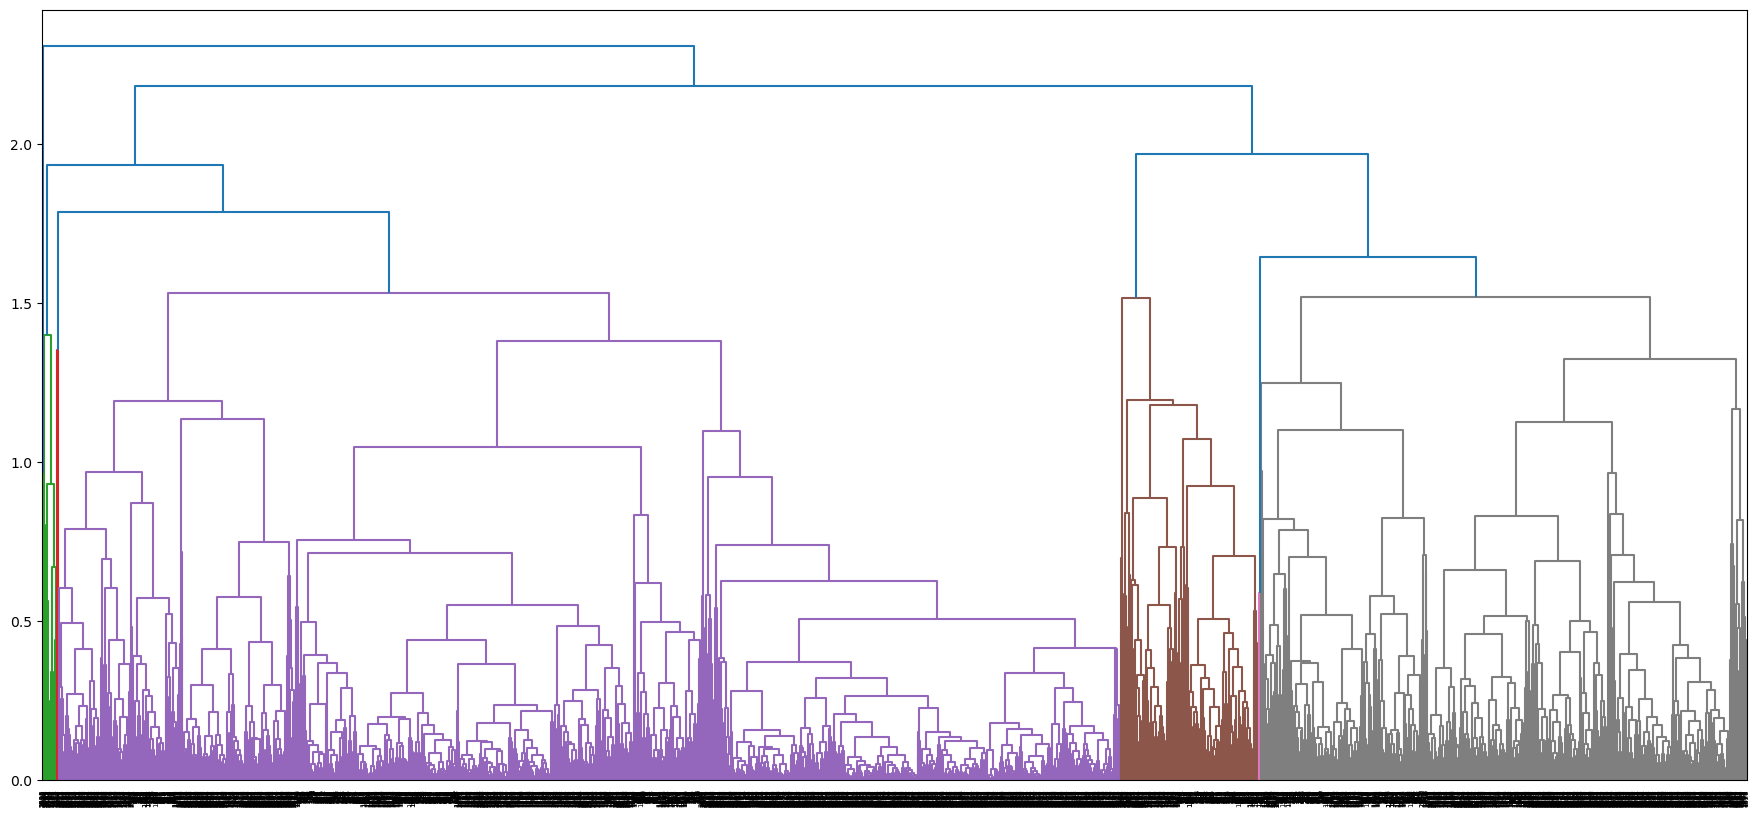

In [36]:
# creating dendogram
plt.figure(figsize=(22,10))
dendogram=sch.dendrogram(sch.linkage(df_norm, method='complete')) #method single calculate minimum distance between points.
plt.show()

In [37]:
# now creating cluster's 
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [38]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [39]:
air_data1['Airid'] = y_hc

In [40]:
air_data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Airid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [41]:
air_data1['Airid'].value_counts()

0    2494
2    1144
1     325
4      31
3       4
Name: Airid, dtype: int64

In [42]:
air_data1[air_data1['Airid']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Airid
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [43]:
from sklearn.metrics import silhouette_score

score = silhouette_score(air_data1, y_hc, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.277


<h4>Inferences:</h4><br>First we have normalized the data because data has varying scales. Then using dendogram we carete linkage using 
               complete method which calculate maximum distance between the two points.Using AgglomerativeClustering we create clusters.
               The Hierarchical Clustering has craeted in five clusters,containing the new column Airid.So,when the 
               new data will come it will check the values and based on it define the Airid.'''

## 2.KMean Clustering

In [44]:
from sklearn.cluster import KMeans   #importing KMeans clustering library .

In [45]:
#importing of csv file.
air_data2=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
air_data2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [46]:
air_data2.shape

(3999, 12)

In [47]:
air_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [48]:
air_data2=air_data2.rename({'Award?':'Award'},axis=1) #renaming the Award columns.

In [49]:
air_data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [50]:
air_data2[air_data2.duplicated()].shape  #no duplicate records.

(0, 12)

In [51]:
air_data3=air_data2.drop(['ID#'],axis=1)

In [52]:
air_data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
air_data3[air_data3.duplicated()].shape  #there is one row is duplicate records.

(1, 11)

In [54]:
air_data3=air_data3.drop_duplicates()      #removing the duplicates 

In [55]:
air_data3[air_data3.duplicated()].shape  #duplicate record has been deleted 

(0, 11)

In [56]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(air_data3.iloc[:,0:])

In [57]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

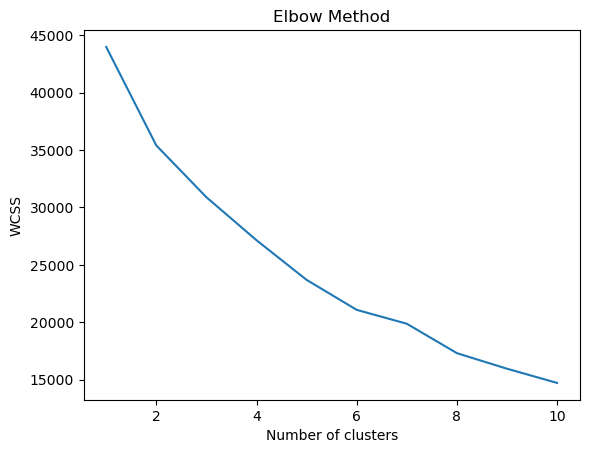

In [58]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h4>By elbow method we can select the number of clusters as it is calculate Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k)</h4>

In [59]:
#creating KMean clustering

new_clusters=KMeans(n_clusters=6,random_state=100) #from above elbow method we have choose number of clusters.
new_clusters.fit(scaled_Univ_df)

KMeans(n_clusters=6, random_state=100)

In [60]:
new_clusters.labels_

array([4, 4, 4, ..., 1, 4, 4])

In [61]:
#Assign clusters to the data set
air_data3['clusterid'] = new_clusters.labels_

In [62]:
#these are standardized values.
new_clusters.cluster_centers_

array([[ 1.18688587e+00,  8.65330449e-01,  1.29741762e-01,
        -9.82542913e-02, -6.27744600e-02,  6.47745997e-01,
         1.67643084e+00,  3.65399823e+00,  3.93626814e+00,
         2.80213912e-01,  8.78542286e-01],
       [-1.60992746e-01,  5.68312493e-02, -2.64275436e-01,
        -9.82542913e-02, -6.27744600e-02, -2.69906359e-01,
        -1.18470334e-01, -4.16535356e-02, -4.35097015e-02,
         4.69283088e-02,  1.30365921e+00],
       [ 6.25687091e-01, -1.32907200e-02,  1.48811866e+00,
        -9.82542913e-02, -5.14177339e-02,  1.26752429e+00,
         8.35402611e-01, -7.45995336e-02, -7.75391005e-02,
         4.63538293e-01,  4.42767787e-01],
       [ 6.39500591e-01, -8.44693245e-02,  1.02183982e+00,
        -9.82542913e-02,  1.56443349e+01,  3.17931660e+00,
         1.71441020e+00,  3.32067952e-02,  5.95983297e-02,
         2.39581899e-01,  3.37318153e-01],
       [-2.98804147e-01, -7.53930634e-02, -5.46035717e-01,
        -9.82542913e-02, -6.03096460e-02, -5.13028434e-01,
  

In [63]:
air_data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [64]:
from sklearn.metrics import silhouette_score

score = silhouette_score(air_data3, new_clusters.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.027


<h4>Inferences:</h4><br>First we have normalized the data because data has varying scales using StandardScaler method.Then using elbow 
               method we have decided that how many clusters should we create for our dataset.
               The KMean Clustering has craeted six clusters,containing the new column Clusterid.So,when the 
               new data will come it will check the values and based on it define the cluterid to that particluar record.'''

### 3.DBSCAN Clustering

In [65]:
from sklearn.cluster import DBSCAN   #importing DBSCAN clustering library.

In [66]:
#importing of csv file.
air_data3=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
air_data3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [67]:
air_data3.shape

(3999, 12)

In [68]:
air_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [69]:
air_data3=air_data3.rename({'Award?':'Award'},axis=1) #renaming the Award columns.

In [70]:
air_data3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [71]:
air_data3[air_data3.duplicated()].shape  #no duplicate records.

(0, 12)

In [72]:
air_data4=air_data3.drop(['ID#'],axis=1) #droping the ID column

In [73]:
air_data4.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [74]:
air_data4[air_data4.duplicated()].shape  #there is one row is duplicate records.

(1, 11)

In [75]:
air_data4=air_data4.drop_duplicates()      #removing the duplicates 

In [76]:
air_data4[air_data4.duplicated()].shape  #duplicate record has been deleted 

(0, 11)

In [77]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(air_data4.iloc[:,0:])

In [78]:
scaled_Univ_df

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [79]:
#creating clusters
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(scaled_Univ_df)

DBSCAN(eps=0.8, min_samples=6)

In [80]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [81]:
#Assign clusters to the data set
air_data4['clusterid_new'] = dbscan.labels_

In [82]:
air_data4[air_data4['clusterid_new']==-1] #these are the noisy samples in our data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3953,59927,739,1,1,1,3100,3,0,0,1464,1,-1
3954,33972,0,3,1,1,21029,29,0,0,1467,1,-1
3956,47301,1005,1,1,1,4561,4,0,0,1464,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [83]:
from sklearn.metrics import silhouette_score

score = silhouette_score(air_data4, dbscan.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.381


<h4>Inferences:</h4><br>First we have normalized the data because data has varying scales using StandardScaler method.The DBSCAN clusters 
               find out noise from our data then we create epsilon,min points,an border point.And the noisy is denoted by -1.
               